## Day 7

### Part 1

Network analysis using Python [NetworkX](https://networkx.org) library.

In [18]:
import networkx as nx
import matplotlib.pyplot as plt

def getGraph(lines):
    G = nx.DiGraph() # Directed graphs, i.e. graphs with directed edges.
    for l in lines:
        G.add_edge(l.split(" ")[1],l.split(" ")[7])
    return G

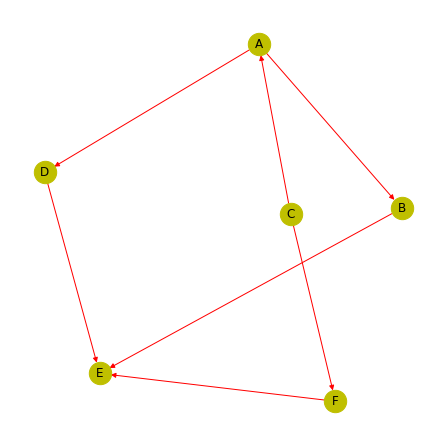

In [19]:
lines_test = [
"Step C must be finished before step A can begin.",
"Step C must be finished before step F can begin.",
"Step A must be finished before step B can begin.",
"Step A must be finished before step D can begin.",
"Step B must be finished before step E can begin.",
"Step D must be finished before step E can begin.",
"Step F must be finished before step E can begin."
]

G_test = getGraph(lines_test)

plt.figure(figsize=(6,6))
pos = nx.spring_layout(G_test)
nx.draw(G_test,pos,cmap=plt.get_cmap('jet'),node_size = 500,edge_color='r',node_color="y")
lab = nx.draw_networkx_labels(G_test, pos)

NetworkX has severa network handy sorting algorithms implemented, among which [lexicographical topological sort](https://pelegm-networkx.readthedocs.io/en/latest/reference/generated/networkx.algorithms.dag.lexicographical_topological_sort.html), that return a `lexicographically_topologically_sorted_nodes` object, an iterable of node names in lexicographical topological sort order.

See also: https://en.wikipedia.org/wiki/Topological_sorting

In [16]:
print("Test 1:","".join(nx.lexicographical_topological_sort(G_test)))

Test 1: CABDFE


Part 1: MNQKRSFWGXPZJCOTVYEBLAHIUD


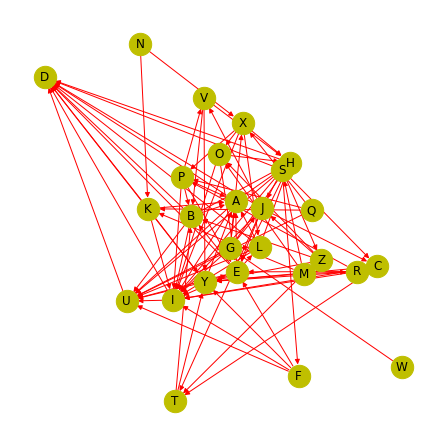

In [17]:
with open('data/input07.txt') as f:
    lines = [l.strip("\n") for l in f.readlines()]

G = getGraph(lines)

plt.figure(figsize=(6,6))
pos = nx.spring_layout(G)
nx.draw(G,pos,node_size = 500,edge_color='r',node_color="y")
lab = nx.draw_networkx_labels(G,pos)
    
print("Part 1:","".join(nx.lexicographical_topological_sort(G)))